In [1]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt


In [2]:
# Get data
symbol = "BTCUSDT"
timeFrame = "1h"
startDate = "2019-01-01"
endDate = "2022-08-28"
client = Client()
bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
df["open"] = pd.to_numeric(df["open"])
df["high"] = pd.to_numeric(df["high"])
df["low"] = pd.to_numeric(df["low"])
df["close"] = pd.to_numeric(df["close"])
df["volume"] = pd.to_numeric(df["volume"])
df

,open,high,low,close,volume,date
0,3701.23,3713.00,3689.88,3700.31,686.367420,2019-01-01 00:00:00
1,3700.20,3702.73,3684.22,3689.69,613.539115,2019-01-01 01:00:00
2,3689.67,3695.95,3675.04,3690.00,895.302181,2019-01-01 02:00:00
3,3690.00,3699.77,3685.78,3693.13,796.714818,2019-01-01 03:00:00
4,3692.32,3720.00,3685.94,3692.71,1317.452909,2019-01-01 04:00:00
...,...,...,...,...,...,...
31977,20018.00,20040.40,19941.83,20007.99,4374.049180,2022-08-27 20:00:00
31978,20007.99,20029.84,19870.01,19873.06,2779.324280,2022-08-27 21:00:00
31979,19874.25,20103.57,19858.43,20020.08,8501.926530,2022-08-27 22:00:00
31980,20021.35,20087.65,19992.55,20037.60,5025.547650,2022-08-27 23:00:00


In [25]:
# SMA strategy
sma_parameters = {
    "name":"SMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.1,                                     ## float
    "long_period": 100,                               ## long period of SMA curve
    "short_period": 30,                               ## short period of SMA curve
    "trading_logistic":"short",                       ## "long", "short", "both"
    "trading_unit": "same_money"                      ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

# Buy and hold
buy_and_hold_parameters = {
    "name":"buy and hold",                            ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.0001,                                  ## float
}
buy_and_hodl = Strategies.Buy_and_Hold(buy_and_hold_parameters)

*--------------------------------*
strategy: SMA
expected return: 258.54300968165376
sharpe ratio: 0.7546675618872988
*--------------------------------*
strategy: buy and hold
expected return: 191.41719539985203
sharpe ratio: 0.9962357962173297


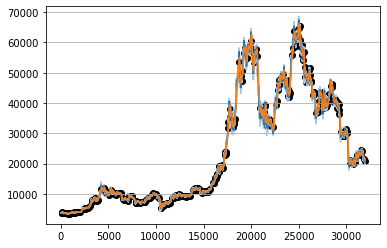

*--------------------------------*
strategy: SMA
trading count: 361
profit: 485.1833865458693
MDD: 0.7038650705384847


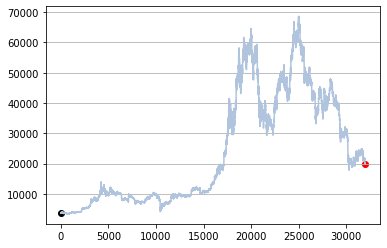

*--------------------------------*
strategy: buy and hold
trading count: 2
profit: 440.149085574255
MDD: 0.9509510562524031


In [26]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", sma.name)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", buy_and_hodl.name)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)

profit, trading_count, buy_record, sell_record, MDD = sma.back_test(df)
print("*--------------------------------*")
print("strategy:", sma.name)
print("trading count:", trading_count)
print("profit:", profit * 100)
print("MDD:", MDD)
profit, trading_count, buy_record, sell_record, MDD = buy_and_hodl.back_test(df)
print("*--------------------------------*")
print("strategy:", buy_and_hodl.name)
print("trading count:", trading_count)
print("profit:", profit * 100)
print("MDD:", MDD)

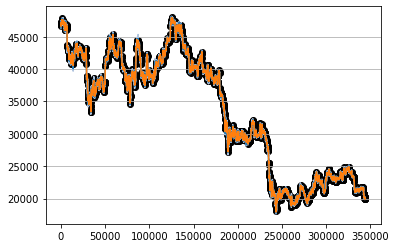

0.0


In [5]:
profit, trading_count, buy_record, sell_record, MDD = sma.back_test(df)
print(profit)
# sharpe_ratio = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=100, window_off=100)
# print("strategy:", sma.name, ", trading count:", trading_count, ", profit:", profit, ", sharpe ratio:", sharpe_ratio, "MDD:", MDD)

# profit, trading_count, buy_record, sell_record, MDD = buy_and_hodl.back_test(df)
# sharpe_ratio = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=100, window_off=100)
# print("strategy:", buy_and_hodl.name, ", trading count:", trading_count, ", profit:", profit, ", sharpe ratio:", sharpe_ratio, "MDD:", MDD)

# Brute force and find the best parameters

In [ ]:
# SMA strategy
sma_parameters = {
    "name":"SMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.001,                                   ## float
    "long_period": 100,                               ## long period of SMA curve
    "short_period": 30,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)